In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics.pairwise import euclidean_distances
from itertools import chain
from mpl_toolkits.mplot3d import Axes3D
import random

# Load the concentric.mat file ....
M = scipy.io.loadmat('concentric.mat')
M = M['X']
z = np.sqrt(M[0]**2 + M[1]**2)
plt.scatter(M[0],M[1], s=80, c = z, marker="o")
plt.show()
mat = M.T

dist = euclidean_distances(mat, mat)
dist  = np.square(dist)

# Perform row mean and col mean operations ....
d_row_mean = np.mean(dist,axis=1)
d_tilda = dist - d_row_mean
d_tilda_col_mean = np.mean(d_tilda,axis=0)
W = d_tilda - d_tilda_col_mean
W = -0.5*W;
w_rbf = np.exp(- W / 0.1 )

# Generate eigen values and eigen vectors ....
eigenval, eigenvec = np.linalg.eig(w_rbf)
eval_mat = np.zeros((152,152))
np.fill_diagonal(eval_mat,eigenval.real)

coord = np.dot(eigenvec,eval_mat)
x_axis = coord[:,0]
x_axis = x_axis.real
y_axis = coord[:,1]
y_axis = y_axis.real
z_axis = coord[:,2]
z_axis = z_axis.real

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.scatter(x_axis, y_axis, z_axis, c = z_axis,s=20)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

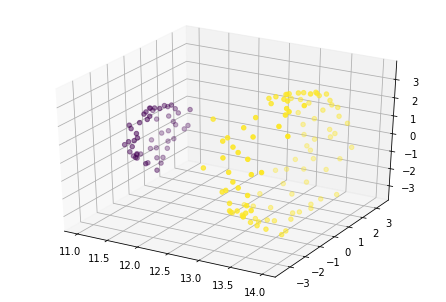

In [2]:
# Generate class variables for both the circles ....
class_0 = list(np.zeros((51,)))
class_1 = list(np.ones((101,)))
cs = list(chain(class_0,class_1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.scatter(x_axis, y_axis, z_axis, c = cs,s=20)
plt.show()

In [3]:
# prepare the input data with the bias for the perceptron ....
bias  = [1] * 152
x_y_z = [list(x_axis),list(y_axis),list(z_axis),bias]
d_mat = np.array(x_y_z)

# Sigmoid and accuracy functions to be used for training ....
def activation_function(z):
    sigmoid_value = 1 / (1 + np.exp(-z))
    return sigmoid_value

def activation_function_derivation(z):
    value = np.multiply(activation_function(z), (1 - activation_function(z)))
    return value

def accuracy(cs,pred):
    same = 0
    for i in range(len(cs)):
        if cs[i] == pred[i]:
            same = same+1
    return same / len(cs)

In [4]:
s = np.random.normal(0, 0.1, 4)
wt = s.reshape((1, 4))
wt_old = wt
alpha = 0.025
n = d_mat.shape[1]
print("Initial Weights and bias are",wt_old)
actual_class = np.array(cs)
actual_class = actual_class.reshape((1, 152))
error = []

for i in range(100000):
    i += 1
    z = np.dot(wt_old, d_mat)
    sigmoid_value = activation_function(z)

    difference = sigmoid_value - actual_class
    error.append(np.sum(abs(difference)))
    err = 0.5 * np.dot(difference, difference.T)

    delta_1 = np.multiply(difference, activation_function_derivation(z))
    delta_2 = alpha * (err / n) * np.dot(delta_1, d_mat.T)
    wt_old = wt_old - delta_2

    # Accuracy determination code...
    y_cap = [1 if x >= 0.5 else 0 for x in list(sigmoid_value)[0]]
    acc = accuracy(cs, y_cap)
    print(acc)
    

    if (acc == 1):
        print("The perceptron Converges at iteration number: ", i)
        break

print("Final weights and the bias are:", wt_old)

Initial Weights and bias are [[ 0.05291509  0.15782071  0.10476509 -0.03922086]]
0.6644736842105263
0.6644736842105263
0.5131578947368421
0.6644736842105263
0.6644736842105263
0.5131578947368421
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.4868421052631579
0.6644736842105263
0.6644736842105263
0.5197368421052632
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.5526315789473685
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.5526315789473685
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.3355263157894737
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.66447

In [5]:
print(error)

[67.29399612833356, 59.13865352058417, 73.66115750522677, 51.92819474483096, 57.26690593490434, 75.34608458622259, 51.30479197457696, 52.783603720330305, 64.24159634241911, 64.93805572898941, 63.42569924801427, 66.708177920298, 59.70568307381454, 73.9387011182431, 51.58601634732323, 55.23144378357243, 75.25080020116805, 51.21783066119572, 52.462755535764, 62.903531684863154, 67.81603097020295, 57.47759561627783, 76.45316216805655, 51.030572845761036, 51.40533951148338, 53.91423305386964, 71.93536129034436, 52.50647392566658, 63.55532341491764, 66.25862223468435, 60.29021636533395, 73.05870224252152, 51.83671365260491, 57.81442115464878, 76.29859964882368, 51.02808943951748, 51.42481576896995, 54.19338475431449, 73.20054843318438, 51.749253318191016, 57.094937138813634, 76.67317311117404, 50.98990700565744, 51.24724846796578, 52.83910827769698, 66.3826800006645, 59.83659011952143, 73.7076311759193, 51.527608922396034, 55.17696608825834, 75.6734895364291, 51.08057776853631, 51.7549519820